<h1 style="background:#e61010; border:0; border-radius: 16px; color:#D3D3D3"><center>Can you estimate abalone age?</center></h1>

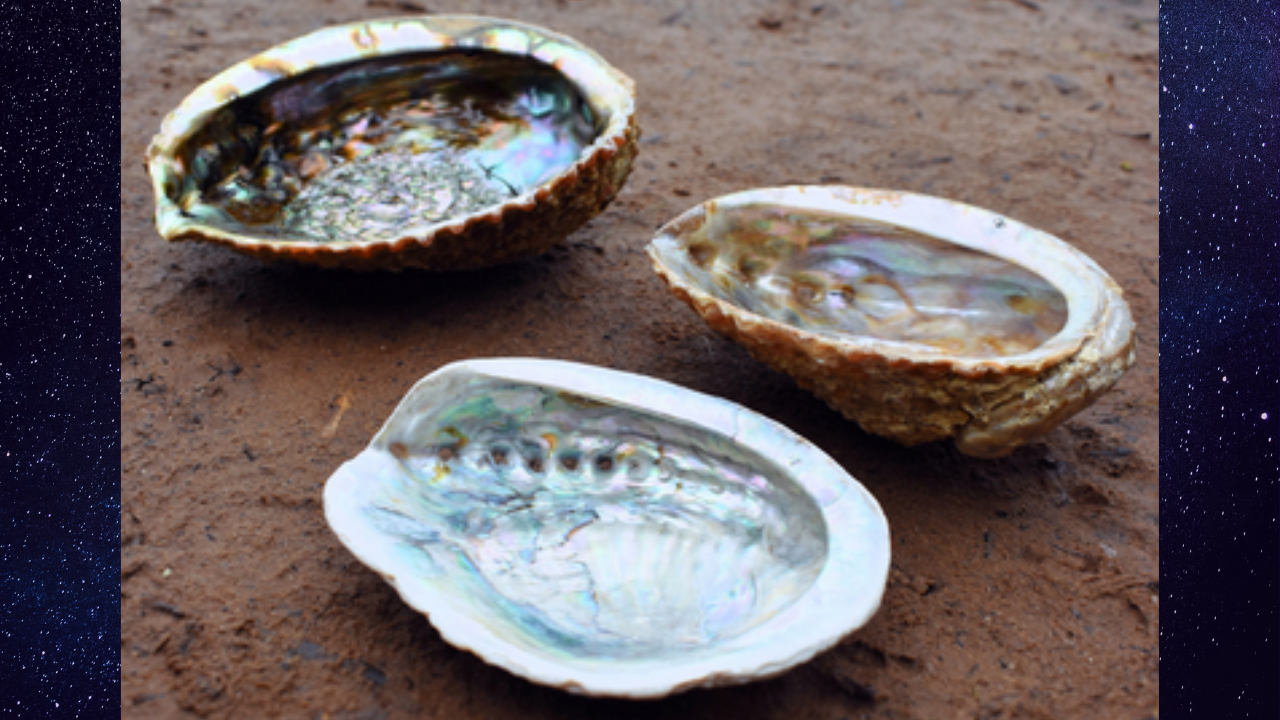

In [2]:
Image(filename='Diseño sin título(1).png')

<h1 style="background:#e61010; border:0; border-radius: 16px; color:#D3D3D3"><center>1.Introduction</center></h1>

<div style="text-align: justify">Abalone is a shellfish considered a delicacy in many parts of the world. An excellent source of iron and pantothenic acid, and a nutritious food resource and farming in Australia, America and East Asia. 100 grams of abalone yields more than 20% recommended daily intake of these nutrients. The economic value of abalone is positively correlated with its age. Therefore, to detect the age of abalone accurately is important for both farmers and customers to determine its price. However, the current technology to decide the age is quite costly and inefficient. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a laborious task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem. However, for this problem we shall assume that the abalone's physical measurements are sufficient to provide an accurate age prediction.</div>


**Paper objectives**:
1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.


These are color palette I will use in it:


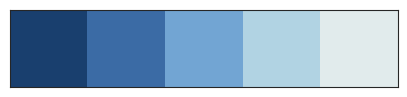

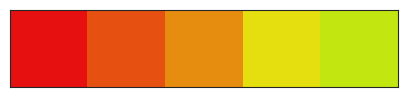

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from scipy.stats import iqr
from skimage import io

from scipy.stats import skew, kurtosis
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 
from sklearn.neighbors import LocalOutlierFactor


from warnings import filterwarnings
filterwarnings('ignore')

sns.set_style('white')
plt.rcParams['font.family'] = 'monospace'

from scipy.stats import zscore
from scipy.stats import iqr
from scipy import stats
from IPython.display import Image

blues = ['#193f6e','#3b6ba5','#72a5d3','#b1d3e3','#e1ebec']
reds = ['#e61010','#e65010','#e68d10','#e6df10','#c2e610']
cmap_blues = sns.color_palette(blues)
cmap_reds = sns.color_palette(reds)
sns.set_palette(cmap_blues)

print('These are color palette I will use in it:')
sns.palplot(cmap_blues)
sns.palplot(cmap_reds)

<h1 style="background:#e61010; border:0; border-radius: 16px; color:#D3D3D3"><center>2.Data preparation</center></h1>

<a id ="2.1"></a><h2 style="background:#e65010; border:0; border-radius: 12px; color:black"><center>2.1 Features of data</center></h2> 

- **The dataset has 4177 entries and 10 columns**:

Feature | Data Type | Measurement | Description 
:--------: | ------- | :-------: | -------  
`sex` | categorical |    | M, F, and I (Infant)
`length` | continuous | mm | longest shell measurement
`diameter` | continuous | mm | perpendicular to the length
`height` | continuous | mm | measured with meat in the shell
`whole_wt` | continuous | grams | whole abalone weight
`shucked_wt` | continuous | grams | the weight of abalone meat
`viscera_wt` | continuous | grams | gut-weight
`shell_wt` | continuous | grams | the weight of the dried shell
`rings` | continuous |  | number of rings in a shell cross-section
`age` | continuous |  | the age of the abalone: the number of rings + 1.5


<a id ="2.2"></a><h2 style="background:#e65010; border:0; border-radius: 12px; color:black"><center>2.2 General information</center></h2> 

Now we can see all the general information of the dataset. First we will see the first 5 rows of the dataset. We will go through the typology, we will see that there are no duplicate data and that there are no missing values.

In [4]:
import pandas as pd
abalone = pd.read_csv('./data/abalone.csv')
abalone.head()

sex  length  diameter  height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
0   M   0.455     0.365   0.095    0.5140      0.2245      0.1010     0.150   
1   M   0.350     0.265   0.090    0.2255      0.0995      0.0485     0.070   
2   F   0.530     0.420   0.135    0.6770      0.2565      0.1415     0.210   
3   M   0.440     0.365   0.125    0.5160      0.2155      0.1140     0.155   
4   I   0.330     0.255   0.080    0.2050      0.0895      0.0395     0.055   

   rings   age  
0     15  16.5  
1      7   8.5  
2      9  10.5  
3     10  11.5  
4      7   8.5

In [5]:
print('💠Shape of data:\n', '\t▶ Entries:',abalone.shape[0],'\n \t▶ Columns:',abalone.shape[1])

💠Shape of data:
 	▶ Entries: 4177 
 	▶ Columns: 10


In [6]:
print('💠 General information of data:\n')
abalone.info()

💠 General information of data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


💠 Are there missing values?



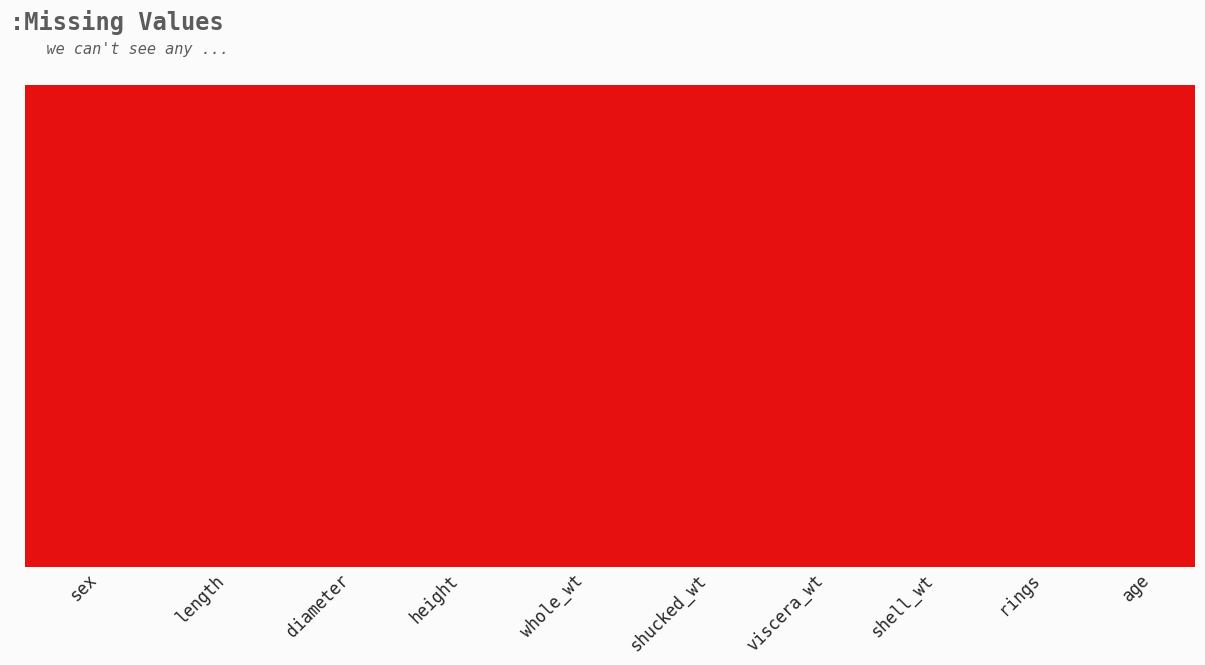

In [7]:
print('💠 Are there missing values?\n')
bg_color = '#fbfbfb'
txt_color = '#5c5c5c'
# check for missing values
fig, ax = plt.subplots(tight_layout=True, figsize=(12,6))

fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

mv = abalone.isna()
ax = sns.heatmap(data=mv, cmap=cmap_reds, cbar=False, ax=ax, )

ax.set_ylabel('')
ax.set_yticks([])
ax.set_xticklabels(labels=mv.columns, size=12,rotation=45)
ax.tick_params(length=0)

fig.text(
    s=':Missing Values',
    x=0, y=1.1,
    fontsize=17, fontweight='bold',
    color=txt_color,
    va='top', ha='left'
)

fig.text(
    s='''
    we can't see any ...
    ''',
    x=0, y=1.075,
    fontsize=11, fontstyle='italic',
    color=txt_color,
    va='top', ha='left'
)

plt.show()

In [8]:
print('💠 Duplicate of data:')
print('\t▶ There are:', abalone[abalone.duplicated()==True].shape[0],'data duplicate.')

💠 Duplicate of data:
	▶ There are: 0 data duplicate.


<a id ="2.3"></a><h2 style="background:#e65010; border:0; border-radius: 12px; color:black"><center>2.3 Data preprocessing</center></h2>

<a id ="2.3.1"></a><h2 style="background:#e68d10; border:0; border-radius: 12px; color:black"><center>2.3.1 Data typology and single visualization</center></h2>

<a id ="2.3.1.1"></a><h3 style="background:#e6df10; border:0; border-radius: 12px; color:black"><center>2.3.1.1 Categorical data</center></h3>

The only categorical feature is sex. It is divided into three subcategories: male, female and infant. As can be seen, the distributions between the three categories is homogeneous. The noteworthy fact is that the female subcategory has a lower mean than the other two.

In [1]:
!pip install squarify

In [11]:
# helper functions
def despine_ax(ax, spines=None):
    if spines is None:
        spines = ['top','left','right','bottom']
    for spine in spines:
        ax.spines[spine].set_visible(False)

def get_line(x=None, y=None, alpha=0.5, lw=1):
    if x is None:
        x = [0,0]
    if y is None:
        y = [0,0]
    return lines.Line2D(xdata=x, ydata=y, lw=lw, alpha=alpha, color='#aeaeae', transform=fig.transFigure, figure=fig)

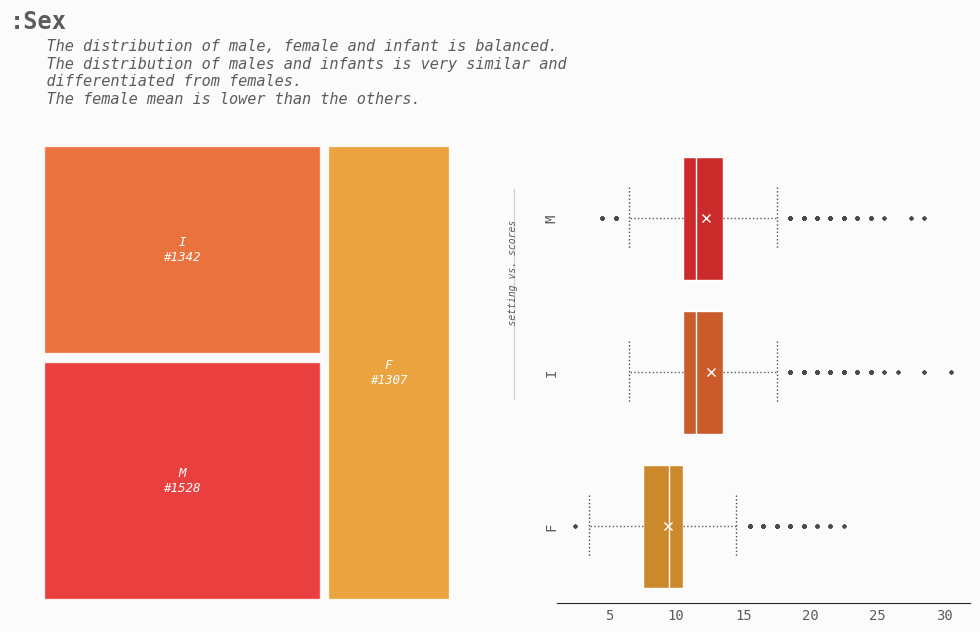

In [12]:
import squarify

sizes = abalone['sex'].value_counts().values
labels = [label+'\n#'+str(size) for label, size in zip(abalone['sex'].value_counts().index, sizes)]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, tight_layout=False, figsize=(12,6))

ax0 = squarify.plot(
    sizes=sizes,
    label=labels,
    color=cmap_reds,
    alpha=0.8,
    pad=True,
    text_kwargs=dict(color='white', fontsize=9, fontstyle='italic'),
    ax = ax0
)

ax1 = sns.boxplot(
    data=abalone,
    x='age',
    y='sex',
    palette=cmap_reds,
    linewidth=1,
    showmeans=True,
    meanprops=dict(markerfacecolor='white', markeredgecolor='white', marker='x'),
    boxprops=dict(edgecolor='white'),
    medianprops=dict(color='white'),
    whiskerprops=dict(color=txt_color, ls=':'),
    capprops=dict(ls=':'),
    flierprops=dict(markersize=2, marker='D'),
    ax=ax1,
)


fig.patch.set_facecolor(bg_color)
fig.subplots_adjust(wspace=0.25)

ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)

ax0.axis('off')
despine_ax(ax1, ['top','left','right'])

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_yticklabels(abalone['sex'].value_counts().index, rotation=90, va='center', ha='center')
ax1.tick_params(axis='both',length=0, labelcolor=txt_color)

fig.text(
    s=':Sex',
    x=0.1, y=1.1,
    fontsize=17, fontweight='bold',
    color=txt_color, 
    va='top', ha='left'
)

fig.text(
    s='''
    The distribution of male, female and infant is balanced.
    The distribution of males and infants is very similar and 
    differentiated from females. 
    The female mean is lower than the others. 
    ''',
    x=0.1, y=1.08,
    fontsize=11, fontstyle='italic',
    color=txt_color,
    va='top', ha='left'
)

fig.text(
    s='''
    setting vs. scores
    ''',
    x=0.505, y=0.75,
    rotation=90,
    fontsize=7, fontstyle='italic',
    color=txt_color,
    va='top', ha='left'
)

l1 = get_line(x=[0.52,0.52], y=[0.45,0.8])
fig.lines.extend([l1])

plt.show()

<a id ="2.3.1.2"></a><h3 style="background:#e6df10; border:0; border-radius: 12px; color:black"><center>2.3.1.2 Numerical data</center></h3>

There are nine continuous variables (including the target). All have similar scales except age and rings.

**💠-1- We will see the table with the statistical characteristics of each variable.** We have incorporated 3 new variables. We will also add colour for positive values (green) and negative values (red).

In [13]:
abalone_1 =abalone.select_dtypes(include=[np.number])

In [14]:
def colour_map(value):
    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = "black"

    return f"color: {color}"

In [15]:
stats = abalone_1.describe()
stats.loc['var'] = abalone_1.var().tolist()
stats.loc['skew'] = abalone_1.skew().tolist()
stats.loc['kurt'] = abalone_1.kurtosis().tolist()
stats.style.applymap(colour_map)

In the table we can see that the features length and diameter have negative skew.

**💠-2- In the following we will look at the univariate distributions of all numerical variables.**

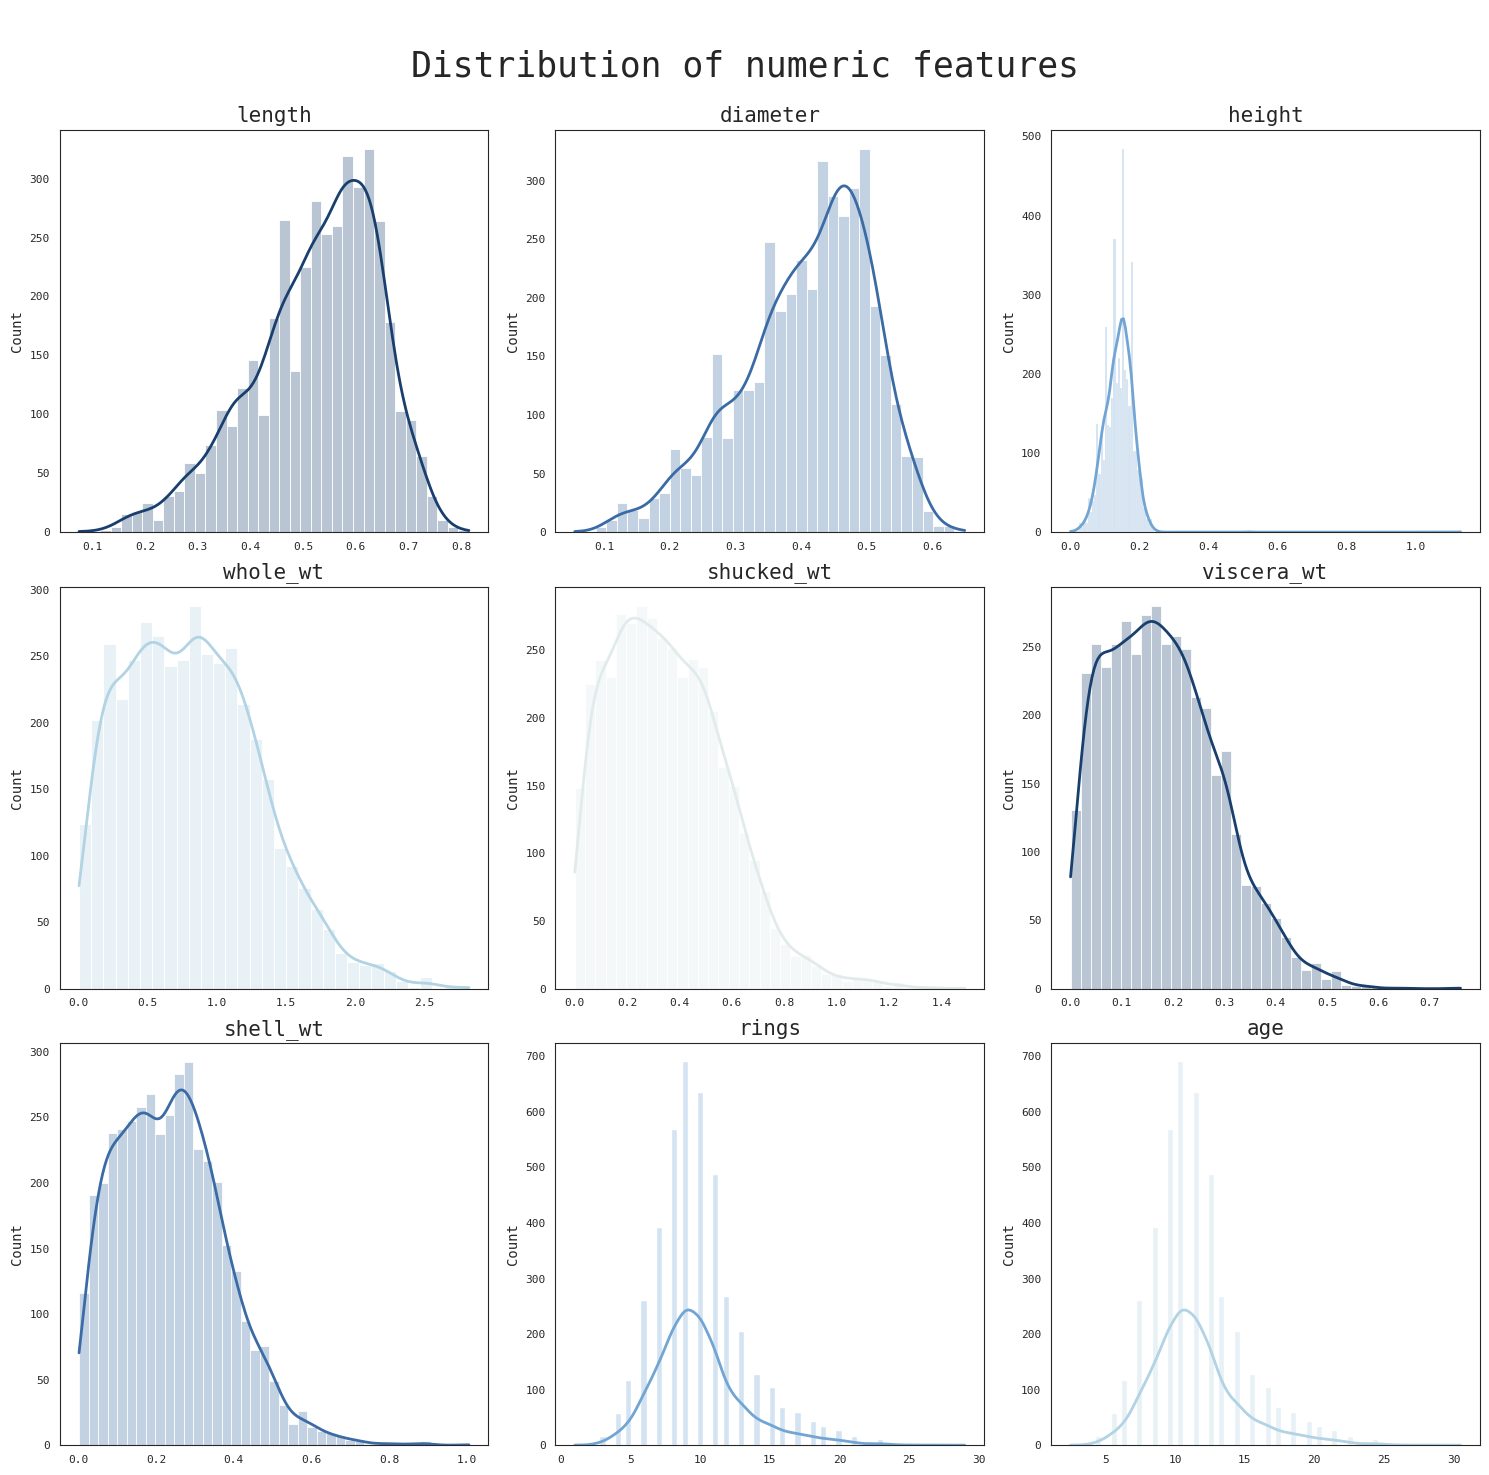

In [16]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flat
columnas_numeric = abalone.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = abalone,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('\nDistribution of numeric features', fontsize = 25);

<a id ="2.3.1.2.1"></a><h3 style="background:#e6df10; border:0; border-radius: 12px; color:black"><center>2.3.1.2.1 Taget distribution</center></h3>

<div style="text-align: justify">Now let's see how the target of this data set (`age`) is distributed. As we can see, it presents a Gaussian distribution with a peak around 11 approximately. This variable is interesting since we remember that it has been created directly from the variable ring + 1.5. Therefore, both variables will behave exactly moving 1.5 points.</div>

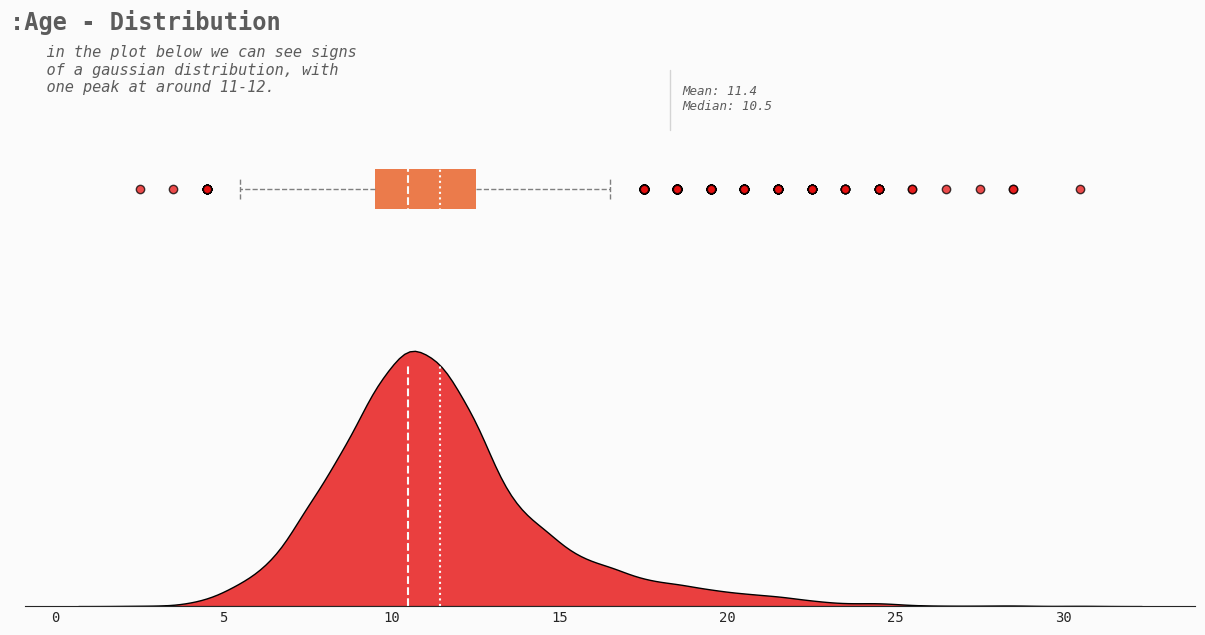

In [17]:
df = abalone.copy()
fig, (ax0, ax1) = plt.subplots(2, 1, tight_layout=True, sharex=True, figsize=(12,6))
fig.patch.set_facecolor(bg_color)

mean = df['age'].mean()
median = df['age'].median()

ax0.boxplot(
    data=df, x='age',
    vert=False, patch_artist=True,
    boxprops=dict(facecolor=cmap_reds[1], lw=0, alpha=0.75),
    whiskerprops=dict(color='gray', lw=1, ls='--'),
    capprops=dict(color='gray', lw=1, ls='--'),
    medianprops=dict(color='#fff', lw=0),
    flierprops=dict(markerfacecolor=cmap_reds[0],alpha=0.75),
    zorder=0
)

ax1 = sns.kdeplot(
    data=df, x='age', shade=True, 
    color=cmap_reds[0], edgecolor='#000', lw=1, 
    zorder=0, alpha=0.8, ax=ax1
)

ax0.axvline(x=mean, ymin=0.4, ymax=0.6, color=bg_color, ls=':', zorder=1, label='mean')
ax1.axvline(x=mean, ymin=0, ymax=0.9, color=bg_color, ls=':', zorder=1)

ax0.axvline(x=median, ymin=0.4, ymax=0.6, color=bg_color, ls='--', zorder=1)
ax1.axvline(x=median, ymin=0, ymax=0.9, color=bg_color, ls='--', zorder=1)

ax0.axis('off')
ax0.set_facecolor(bg_color)

ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.set_yticks([])
ax1.tick_params(length=0)
ax1.set_facecolor(bg_color)

despine_ax(ax1, ['top','left','right'])

fig.text(
    s=':Age - Distribution',
    x=0, y=1.05,
    fontsize=17, fontweight='bold',
    color=txt_color, 
    va='top', ha='left'
)

fig.text(
    s='''
    in the plot below we can see signs
    of a gaussian distribution, with 
    one peak at around 11-12.
    ''',
    x=0, y=1.02,
    fontsize=11, fontstyle='italic',
    color=txt_color,
    va='top', ha='left'
)

fig.text(
    s=f"Mean: {np.round(mean,1)}\nMedian: {np.round(median,1)}",
    x=0.56, y=0.925,
    fontsize=9, fontstyle='italic',
    color=txt_color,
    va='top', ha='left'
)

l1 = get_line(x=[0.55,0.55], y=[0.85,0.95])
fig.lines.extend([l1])

plt.show()

<a id ="2.3.2"></a><h2 style="background:#e68d10; border:0; border-radius: 12px; color:black"><center>2.3.2 Feature engineering</center></h2>

In this section, we will look at several very interesting points.

**💠 First**: **What are the smallest weights that an abalone can have?**
To answer this, we should think about the following point. If the weight is zero it implies either that the abalone is so small that it is rounded to 0 or that it is wrongly scored. 

In [18]:
abalone[abalone['diameter'] == 0.055000]

sex  length  diameter  height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
236   I   0.075     0.055    0.01     0.002       0.001      0.0005    0.0015   

     rings  age  
236      1  2.5

In [19]:
abalone[abalone['length'] == 0.075000]

sex  length  diameter  height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
236   I   0.075     0.055    0.01     0.002       0.001      0.0005    0.0015   

     rings  age  
236      1  2.5

<div style="text-align: justify">As we can see, when we look for the smallest abalone, with the following characteristics (found in the dataset description):
diameter = 0.055000 and length = 0.075000, 
we get row 236 which, if we look at it, has a height=0.01. This shows that we accept the hypothesis that the abalones with height = 0.0 are wrongly annotated.Therefore, we must delete the rows with height = 0.0. In this case, two results appear that we must eliminate. Besides, if we notice, we will see that they have between 6-8 rings, so the weight should be different from 0.0:</div>

In [20]:
abalone[abalone['height']==0.0]

sex  length  diameter  height  whole_wt  shucked_wt  viscera_wt  \
1257   I   0.430      0.34     0.0     0.428      0.2065      0.0860   
3996   I   0.315      0.23     0.0     0.134      0.0575      0.0285   

      shell_wt  rings  age  
1257    0.1150      8  9.5  
3996    0.3505      6  7.5

In [21]:
abalone2 = abalone.drop([1257,3996], axis=0)

In [22]:
abalone2 = abalone2.reset_index()

In [23]:
abalone2 = abalone2.drop(['index'],axis=1)

**💠 Second** **point to note concerns the relationship between the whole_wt characteristic and the other weights.** If we think for a moment, we can realise that `whole_wt` is the sum of the other weights. But the question we ask ourselves is: why isn't it so? That is due to mass of water/blood lost from shucking process. 
In this situation we have to bear in mind the following rule:
- The sum of all weights is equal to or less than `whole_wt` but never greater.
- The difference between `whole_wt` and the other weights is called `water/blood loss`. 

We will write the first condition in this way: 

**condition_1 = abalone['whole_wt'] - abalone['shucked_wt'] - abalone['viscera_wt'] - abalone['shell_wt']**

In [24]:
condition_1 = abalone2['whole_wt'] - abalone2['shucked_wt'] - abalone2['viscera_wt'] - abalone2['shell_wt']
print('There are',abalone2[condition_1 < 0].shape[0],'registers incorrectly annotated.')
print('There are',abalone2[condition_1 == 0].shape[0],'registers that do not loss any water/blood in shucking process.')
# si condition_1 == 0 --> unknown mass of water/blood lost from shucking process.
abalone2['water/blood'] = condition_1

There are 153 registers incorrectly annotated.
There are 4 registers that do not loss any water/blood in shucking process.


In [25]:
abalone2.describe()

length    diameter       height     whole_wt   shucked_wt  \
count  4175.000000  4175.00000  4175.000000  4175.000000  4175.000000   
mean      0.524065     0.40794     0.139583     0.829005     0.359476   
std       0.120069     0.09922     0.041725     0.490349     0.221954   
min       0.075000     0.05500     0.010000     0.002000     0.001000   
25%       0.450000     0.35000     0.115000     0.442250     0.186250   
50%       0.545000     0.42500     0.140000     0.800000     0.336000   
75%       0.615000     0.48000     0.165000     1.153500     0.502000   
max       0.815000     0.65000     1.130000     2.825500     1.488000   

        viscera_wt     shell_wt        rings          age  water/blood  
count  4175.000000  4175.000000  4175.000000  4175.000000  4175.000000  
mean      0.180653     0.238834     9.935090    11.435090     0.050042  
std       0.109605     0.139212     3.224227     3.224227     0.057827  
min       0.000500     0.001500     1.000000     2.500000    -0.447500  
25%       0.093500     0.130000     8.000000     9.500000     0.018000  
50%       0.171000     0.234000     9.000000    10.500000     0.037000  
75%       0.253000     0.328750    11.000000    12.500000     0.068000  
max       0.760000     1.005000    29.000000    30.500000     0.608000

<div style="text-align: justify">The 153 records that state that the sum of the weights is greater than the total weight should be deleted. But first we will study their distribution and show why they should be eliminated.
As we can see in the graph, there is a large condensation near 0.0 and as we look towards smaller values, the distribution decreases. The scale on which the weight of this dataset is designed is in grams and is between 0.002 - 2.826 with a mean of 0.7995. This implies that the sensitivity of the samples is very high, so we show that the 153 records should be removed because they are erroneous in the annotation.</div>

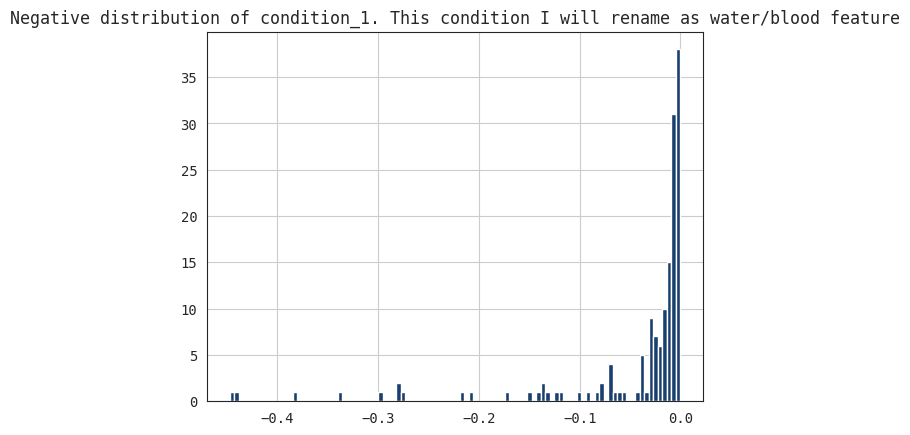

In [26]:
plt.title('Negative distribution of condition_1. This condition I will rename as water/blood feature')
abalone2[condition_1 < 0]['water/blood'].hist(bins=100);

In [27]:
abalone3 = abalone2.drop([42,
 43,
 44,
 45,
 46,
 60,
 61,
 109,
 111,
 124,
 125,
 127,
 147,
 149,
 174,
 176,
 177,
 178,
 193,
 194,
 236,
 317,
 323,
 324,
 326,
 332,
 365,
 389,
 392,
 396,
 408,
 436,
 441,
 629,
 666,
 822,
 889,
 914,
 936,
 945,
 1111,
 1128,
 1139,
 1151,
 1214,
 1216,
 1219,
 1252,
 1263,
 1301,
 1390,
 1411,
 1418,
 1429,
 1432,
 1448,
 1479,
 1527,
 1544,
 1573,
 1606,
 1632,
 1636,
 1639,
 1663,
 1832,
 1848,
 1852,
 1933,
 2004,
 2008,
 2012,
 2016,
 2083,
 2109,
 2113,
 2114,
 2115,
 2116,
 2118,
 2126,
 2145,
 2169,
 2170,
 2194,
 2282,
 2284,
 2289,
 2291,
 2292,
 2300,
 2326,
 2328,
 2329,
 2366,
 2370,
 2412,
 2420,
 2423,
 2433,
 2544,
 2626,
 2640,
 2646,
 2673,
 2706,
 2745,
 2755,
 2782,
 2789,
 2815,
 2853,
 2899,
 2963,
 2984,
 3026,
 3033,
 3047,
 3049,
 3085,
 3087,
 3089,
 3114,
 3162,
 3168,
 3248,
 3252,
 3253,
 3266,
 3274,
 3344,
 3470,
 3471,
 3484,
 3517,
 3600,
 3652,
 3695,
 3710,
 3721,
 3729,
 3764,
 3813,
 3845,
 3848,
 3872,
 3874,
 3883,
 3884,
 3962,
 3968,
 4044,
 4141],axis=0)

In [28]:
abalone3 = abalone3.reset_index()

In [29]:
abalone3 = abalone3.drop(['index'],axis=1)

The 4 records that say that they have not lost any water/blood in the above process should be studied. So, condition_1 = 0.0 which is the same as saying that the feature water/blood = 0.0:

<div style="text-align: justify">The scale on which we work for this feature is between 0.0 - 0.608 with 75% of the quartile = 0.069. This implies that, apart from the fact that there are outliers, also that the scale is too narrow to not differentiate between absolutely zero and almost zero weight. What does this mean? I mean that the sensitivity goes down to the milligram, so I think it is wrong to think that these 4 records are well scored. Therefore, we will eliminate them.</div>

In [30]:
abalone3[abalone3['water/blood'] == 0]

sex  length  diameter  height  whole_wt  shucked_wt  viscera_wt  \
299    I   0.190     0.145    0.04    0.0380      0.0165      0.0065   
597    F   0.430     0.340    0.12    0.3910      0.1555      0.0950   
749    I   0.215     0.155    0.06    0.0525      0.0210      0.0165   
2976   M   0.575     0.480    0.15    0.9465      0.4355      0.2605   

      shell_wt  rings   age  water/blood  
299     0.0150      4   5.5          0.0  
597     0.1405      7   8.5          0.0  
749     0.0150      5   6.5          0.0  
2976    0.2505      9  10.5          0.0

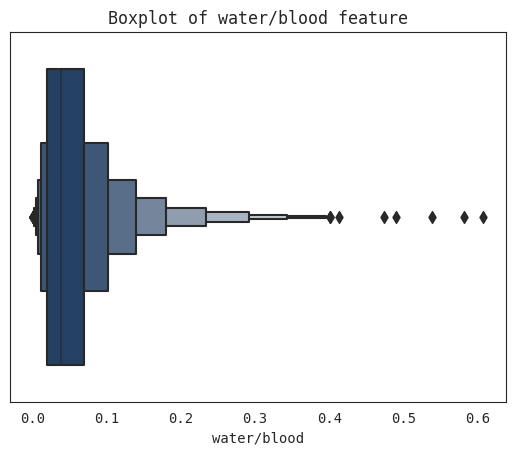

In [31]:
plt.title('Boxplot of water/blood feature')
sns.boxenplot(abalone3['water/blood']);

In [32]:
abalone4 = abalone3.drop([299,597,749,2976],axis=0)

In [33]:
abalone4 = abalone4.reset_index()

In [34]:
abalone4 = abalone4.drop(['index'],axis=1)

In [35]:
abalone4.shape

(4018, 11)

**💠 Third** point to note is that, by definition, the feature age = 1.5 + rings is a direct conversion of age, so it must be removed to eliminate the high correlation between variables. 

In [36]:
abalone4 = abalone4.drop(['rings'],axis=1)

**💠 Fourth**, and final point is that we could calculate the area and surface area of the abalone by approximating a rectangle. However, in this study we will not do so because it will be neither a real nor an approximate calculation because more elements would be missing to be able to make such a calculation in an accurate way. neither real nor approximate because more elements would be missing to be able to make such a calculation in an accurate way.

<a id ="2.3.3"></a><h2 style="background:#e68d10; border:0; border-radius: 12px; color:black"><center>2.3.3 Outliers</center></h2>

To calculate the outliers we will use the interquartile range method known to all. Before applying it, we will transform the categorical variable `sex` into an integer variable. When we apply it, we will have the following transformation:

**Remember:**

Name | Encoding value 
:--------: | :-------: 
M | 2
F | 0 
I | 1

Once this is done, we apply the interquartile range method and we obtain a 15.06% decrease of the dataset with respect to the original one.

In [37]:
from scipy.stats import zscore
from scipy.stats import iqr
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# plot
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# models
from sklearn.linear_model import PassiveAggressiveRegressor,HuberRegressor,BayesianRidge
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from statsmodels.formula.api import ols


# metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from scipy.stats import iqr
from scipy import stats
#import statsmodels.api as sm

# plot
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to manipulate dataset
import pandas as pd
import numpy as np

In [38]:
'''LabelEnconding the Categorical Data'''
abalone4['sex_enc'] = LabelEncoder().fit_transform(abalone4['sex'].tolist())

In [39]:
abalone5 = abalone4.drop(['sex'],axis=1)

In [40]:
data = abalone5
outlier_list=[]
for c in data.columns[:-1]:
    Q1=data[c].quantile(q=0.25)
    Q3=data[c].quantile(q=0.75)
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    outlier_list.extend(data[  (data[c] < L_outliers) | (data[c] > U_outliers)  ].index)

In [41]:
abalone6 = abalone5.drop(outlier_list,axis=0).reset_index(drop = True)

In [42]:
abalone6_1 = abalone6.reset_index()
abalone6_2 = abalone6_1.drop(['index'],axis=1)

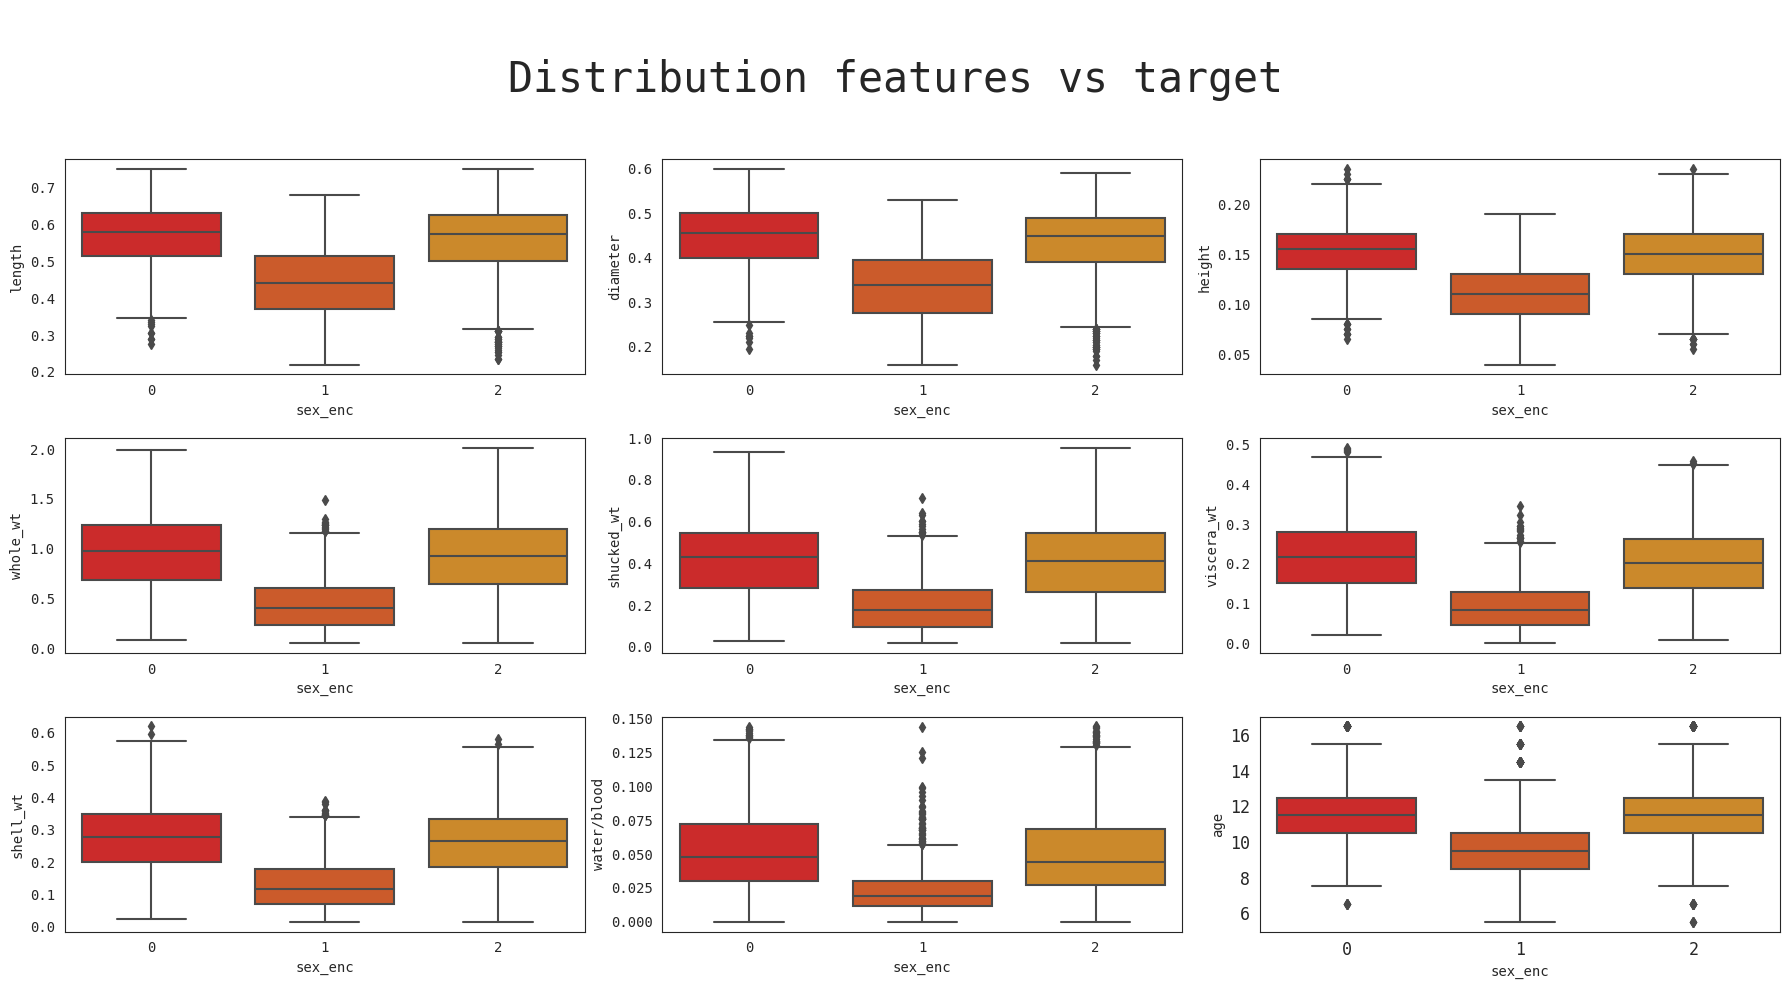

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
X0 = abalone6_2[['sex_enc', 'length', 'diameter', 'height', 'whole_wt', 'shucked_wt',
       'viscera_wt', 'shell_wt', 'water/blood', 'age']]
fig.suptitle('\nDistribution features vs target\n', size=30)

sns.boxplot(ax=axes[0, 0], data=X0, x='sex_enc', y='length',      palette = cmap_reds)
sns.boxplot(ax=axes[0, 1], data=X0, x='sex_enc', y='diameter',    palette=cmap_reds)
sns.boxplot(ax=axes[0, 2], data=X0, x='sex_enc', y='height',      palette=cmap_reds)
sns.boxplot(ax=axes[1, 0], data=X0, x='sex_enc', y='whole_wt',    palette=cmap_reds)
sns.boxplot(ax=axes[1, 1], data=X0, x='sex_enc', y='shucked_wt',  palette=cmap_reds)
sns.boxplot(ax=axes[1, 2], data=X0, x='sex_enc', y='viscera_wt',  palette=cmap_reds)
sns.boxplot(ax=axes[2, 0], data=X0, x='sex_enc', y='shell_wt',    palette=cmap_reds)
sns.boxplot(ax=axes[2, 1], data=X0, x='sex_enc', y='water/blood', palette=cmap_reds)
sns.boxplot(ax=axes[2, 2], data=X0, x='sex_enc', y='age',         palette=cmap_reds)

fig.tight_layout()
plt.xticks(size=12)
#plt.xlabel(size=12)
plt.yticks(size=12)
#plt.ylabel(size=12)
plt.show()

We still see the presence of outliers, so we have two options, either to further close the outliers or to leave them as they are. We prefer the second option because we consider them to be very close to the upper and lower interquartiles. 

<a id ="2.4"></a><h2 style="background:#e65010; border:0; border-radius: 12px; color:black"><center>2.4 Bivariate analysis visualization </center></h2>

In this section we will look at the relationship between variables and what kind of correlation they have with each other.  

**Remember:**

Name | Encoding value 
:--------: | :-------: 
M | 2
F | 0 
I | 1

There are some interesting ideas if we look at the following pairplot graph.

- `length` has a linear relationship with `diameter` and `height`.
- All weight features (except water/blood) have a positive exponential relationship with `diameter` and `height` and `length`.

In [44]:
abalone7 = abalone6_2.copy()

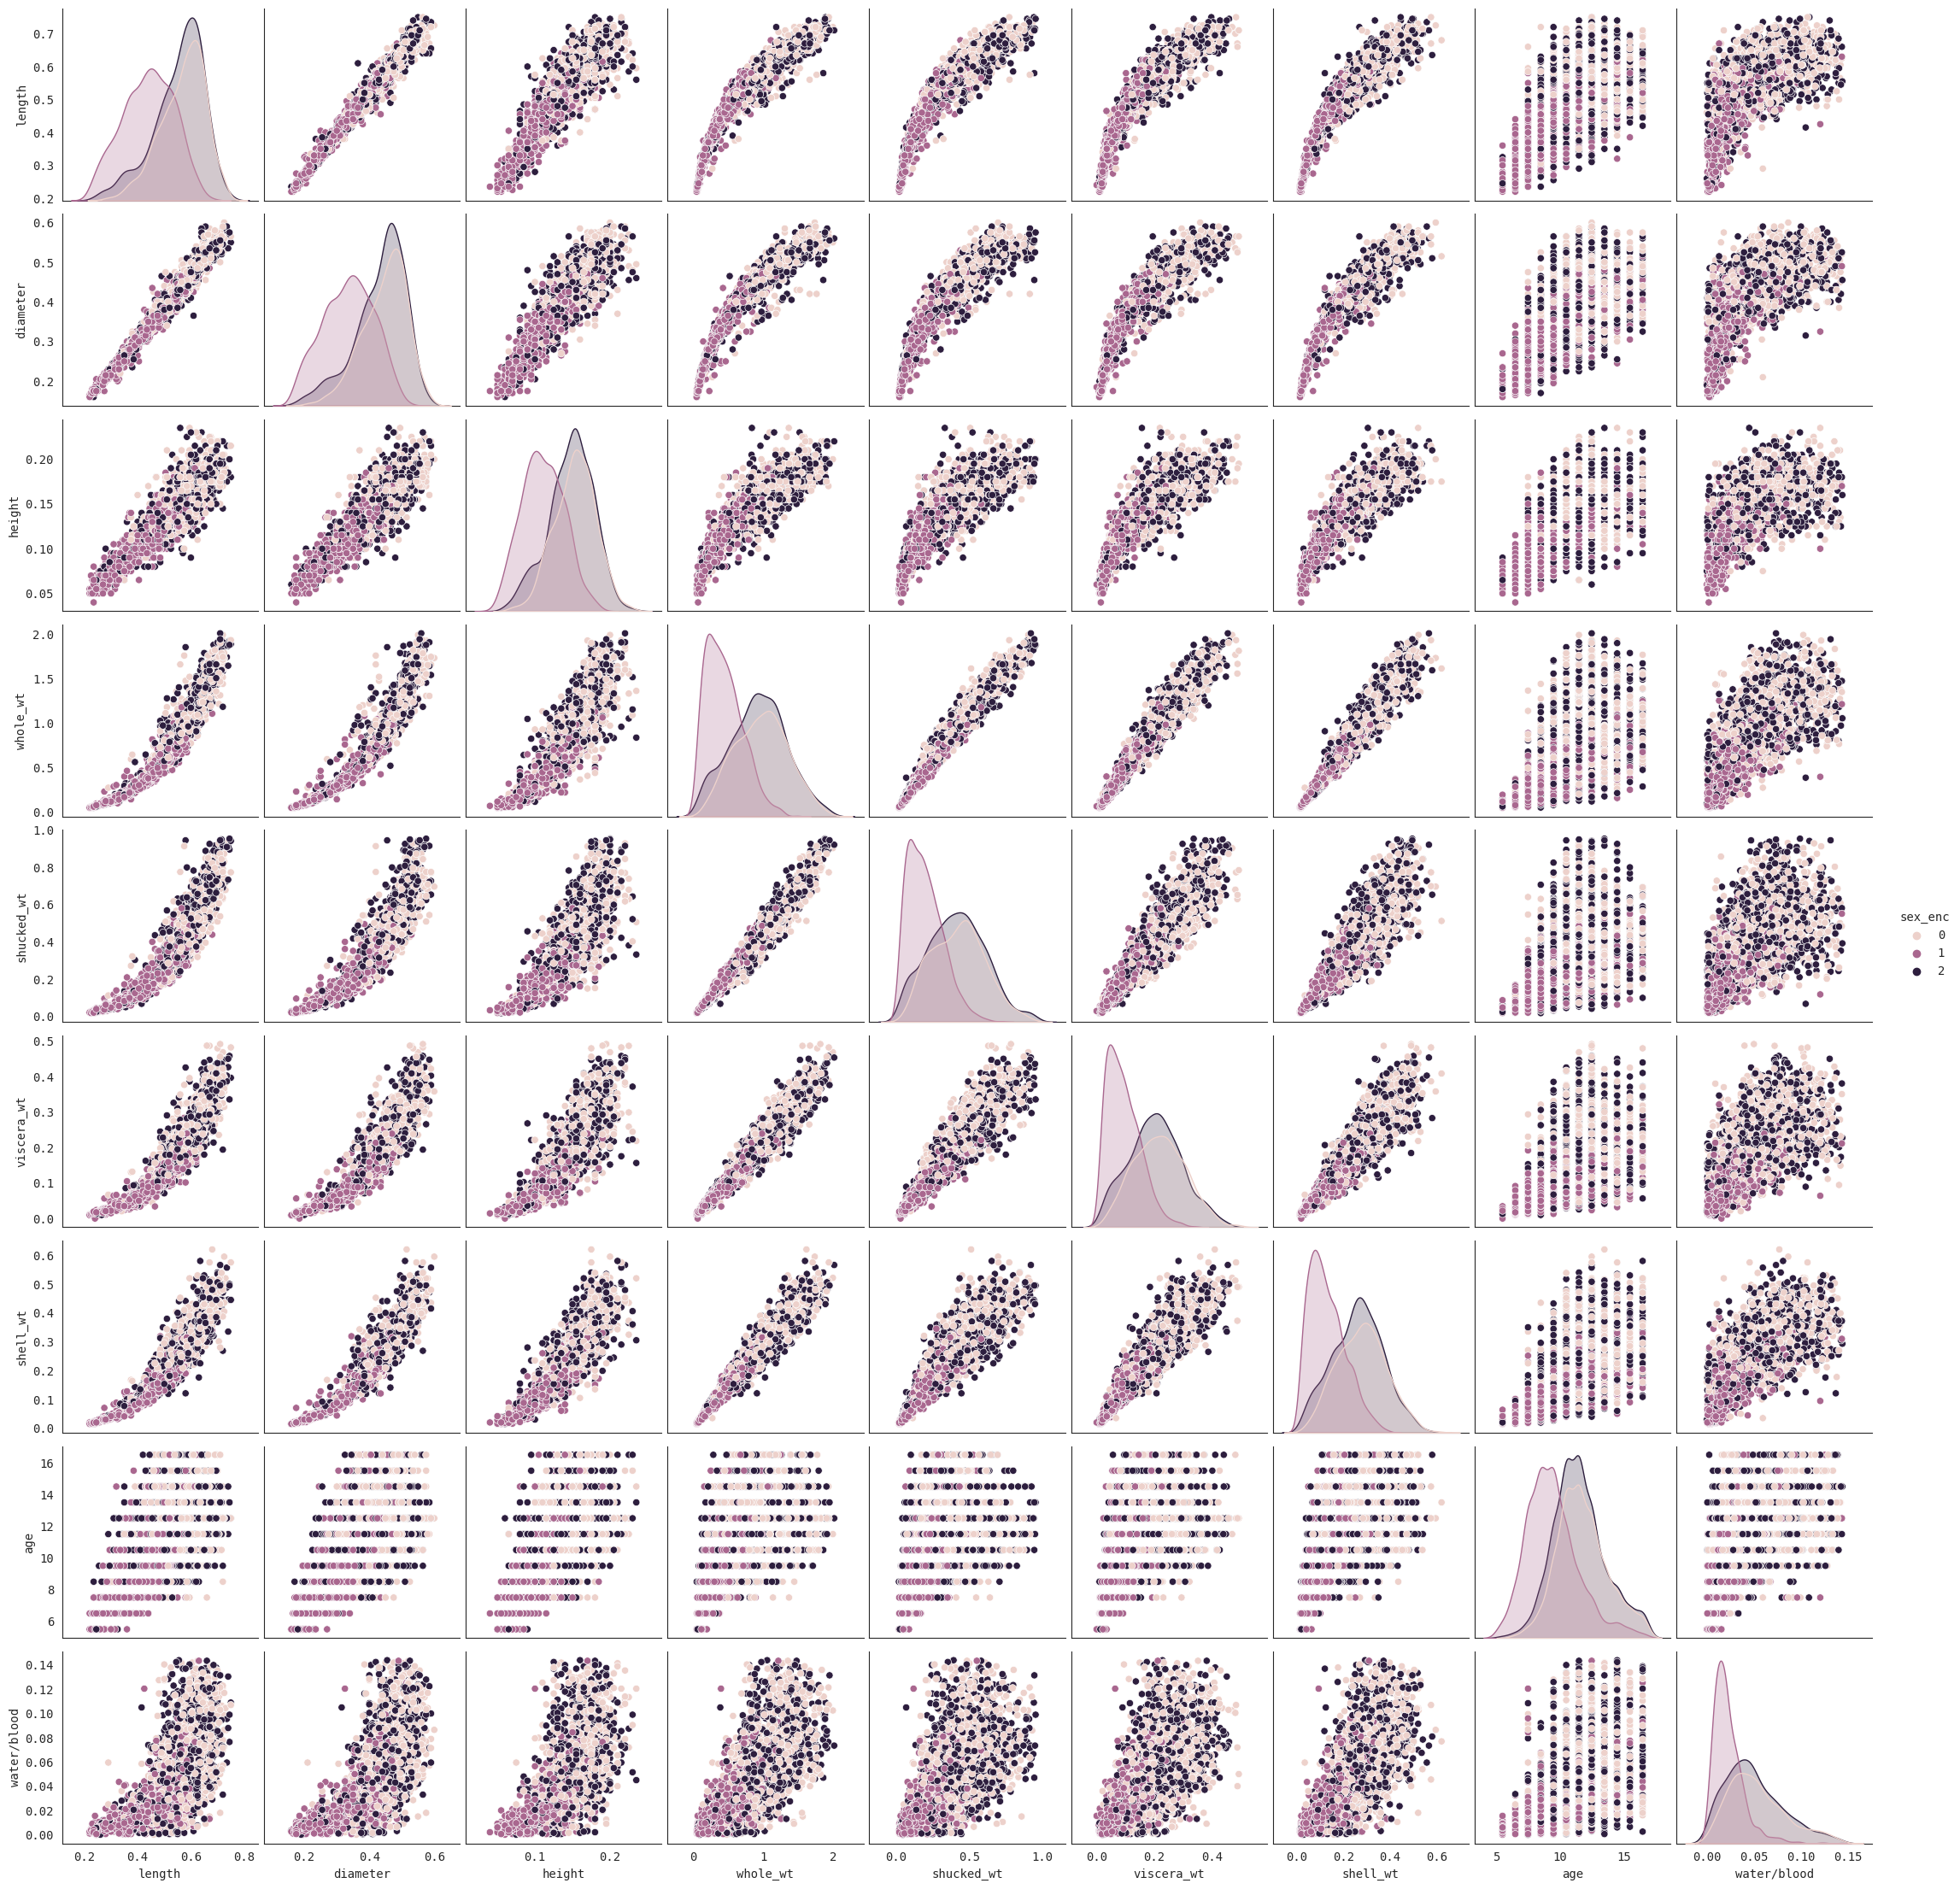

In [46]:
sns.pairplot(abalone7, hue='sex_enc');

<a id ="2.4.1"></a><h2 style="background:#e68d10; border:0; border-radius: 12px; color:black"><center>2.4.1 Correlation analysis</center></h2>

<div style="text-align: justify">Below is the correlation between variables. We can see that there is a high correlation between the first 7 variables as we thought in the previous section. Most of the correlations are higher than 0.85. With this data we could think about the creation of more variables. But, for the second objective of this paper, which is to know which variables are the most important for the prediction of abalone age, I prefer to have the variables clean, i.e. without being combinations of others.</div>

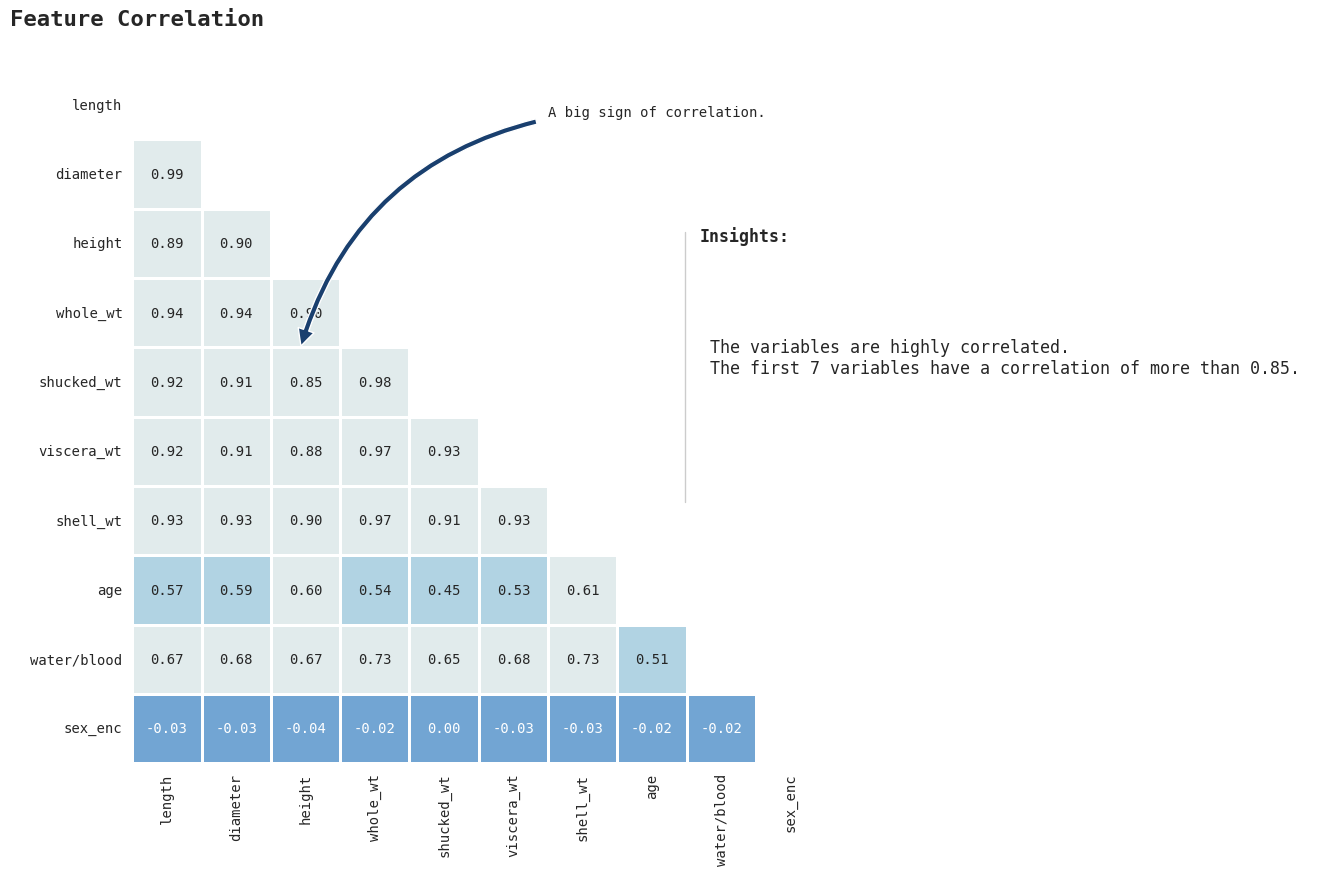

In [47]:
# create correlation map
corr_map = abalone7.corr()

# create mask
mask = np.triu(np.ones_like(corr_map,dtype=bool))

# create correlation heatmap
fig = plt.figure(figsize=(15,9))

ax = sns.heatmap(
    data=corr_map, square=True, center=0, linewidth=1,
#     cmap=sns.diverging_palette(240, 10, s=60, l=40, n=9, center="light", as_cmap=True),
    cmap=cmap_blues,
    cbar=False,
    mask=mask,
    annot=True,
    fmt='.2f',
    cbar_kws={'shrink': 0.82}
)

ax.annotate(
    'A big sign of correlation.',
    fontsize=10,fontweight='light',
    xy=(2.4, 4.1), xycoords='data',
    xytext=(0.6, 0.95), textcoords='axes fraction',
    arrowprops=dict(
        facecolor=blues[0], shrink=0.025, 
        connectionstyle='arc3, rad=0.3'),
    horizontalalignment='left', verticalalignment='top'
)

# seperation lines    
l1 = lines.Line2D([0.65, 0.65], [0.4, 0.7], transform=fig.transFigure, figure=fig,color='#ccc',lw=1)
fig.lines.extend([l1])

# Title & Annotation
fig.text(0.2,0.93,'Feature Correlation',fontsize=16, fontweight='bold')
fig.text(0.66,0.69,'Insights:', fontsize=12, fontweight='bold')
fig.text(0.64,0.52,'''
    The variables are highly correlated.
    The first 7 variables have a correlation of more than 0.85. 
''', fontsize=12, fontweight='light')

plt.show()

Although the different correlations of the features with respect to the target are shown, we have decided to graph it separately and see which ones have a positive and negative correlation with colors, for a better visual interpretation.

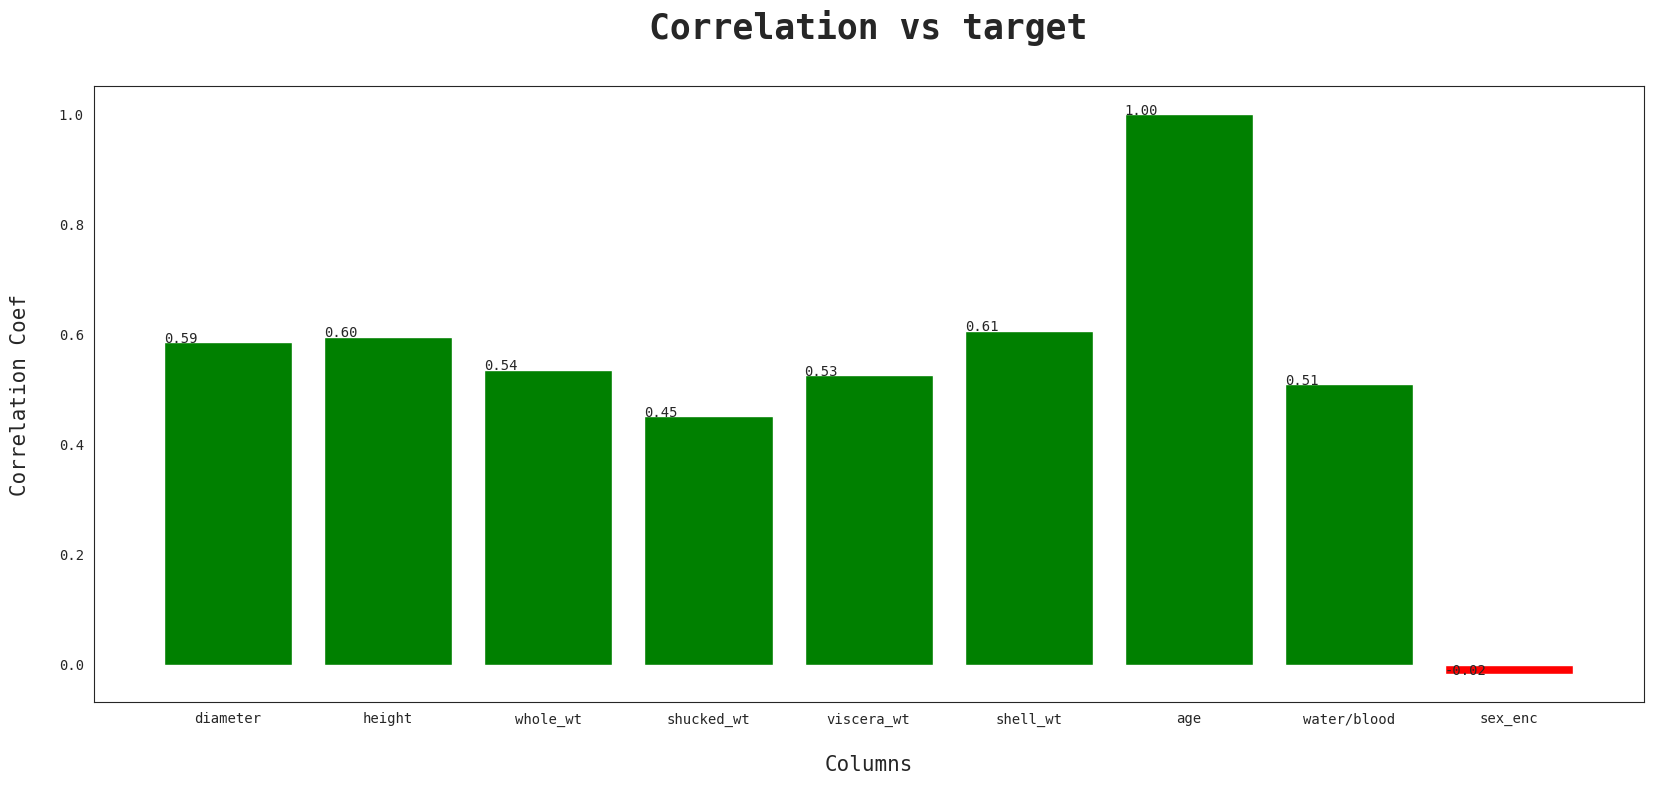

In [48]:
data = abalone7[abalone7.columns[:]].corr()['age']
data = data.to_frame()

# Fetch Index and Values From Data
index = data.index[1:]
values = data.values.flatten()[1:]

# Set figure size, title and labels
fig,ax = plt.subplots(figsize=(20,8))
ax.set_title("Correlation vs target\n", size=25,weight='semibold', fontname = 'monospace')
ax.set_xlabel("\nColumns", size=15, fontname = 'monospace')
ax.set_ylabel("Correlation Coef\n", size=15, fontname = 'monospace')

# Plot a Barplot
plot = plt.bar(index,values,color=['red' if x<0 else 'green' for x in values])

# Annotate Plots
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()),(p.get_x(),p.get_height()))

# Show plot
plt.show()

The three variables that have the highest correlation with respect to the target variable in descending order are: `shell_wt`,  `height` y `diameter`.

<a id ="2.4.2"></a><h2 style="background:#e68d10; border:0; border-radius: 12px; color:black"><center>2.4.2 How does the sex of the abalone influence its characteristics?</center></h2>

First I am going to make a graph with all the characteristics differentiated by sex. 

**Remember:**

Name | Encoding value 
:--------: | :-------: 
M | 2
F | 0 
I | 1

<div style="text-align: justify">As can be seen in this graph, the behaviour shown by the distributions of the infant subcategory is very different from the others. This could lead to the conclusion of merging the two adult subcategories, resulting in 2 subcategories instead of 3. However, we will not do so due to objective number 1 of this paper. Another point to note is that the distribution for infants is always to the left of the other two categories, as it has smaller values. This is consistent with theory.</div>

In [49]:
# get all features, split df into potability classes
feature_cols = [*abalone7.columns.drop(labels='sex_enc')]
df_pot_0 = abalone7[abalone7['sex_enc'] == 2].copy() #Macho
df_pot_1 = abalone7[abalone7['sex_enc'] == 0].copy() #Hembra
df_pot_2 = abalone7[abalone7['sex_enc'] == 1].copy() #Infante

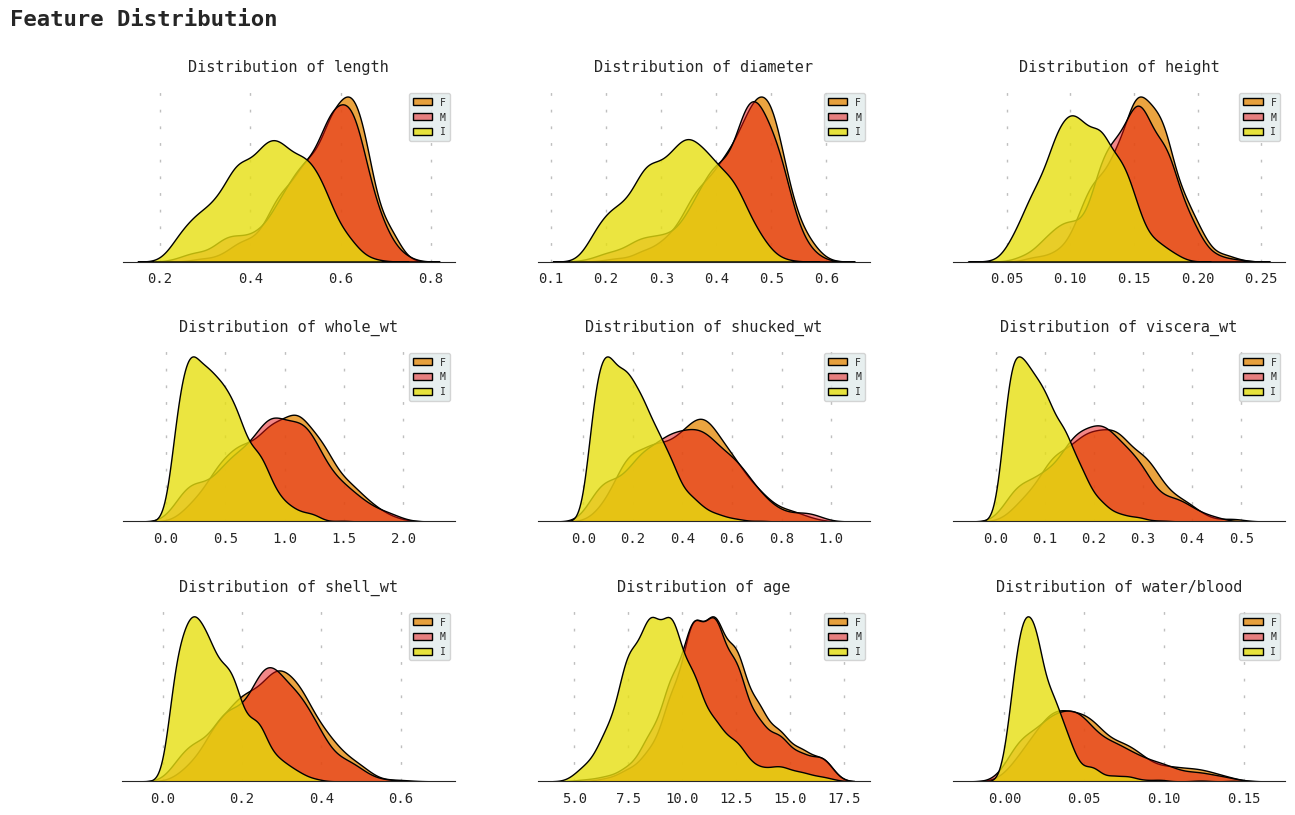

In [50]:
fig = plt.figure(figsize=(15,9))

for idx, feature in enumerate(feature_cols):
    plt.subplot(3,3,idx+1)
    plt.title(f"Distribution of {feature}", size=11, y=1.05)
    plt.grid(color='gray', axis='x', linestyle=':', linewidth=1, alpha=0.5, zorder=0, dashes=(2,10))

    sns.kdeplot(
        data=df_pot_1, x=feature, shade=True, color=reds[2], 
        edgecolor='black', linewidth=1, alpha=0.8, label='F'
    )

    sns.kdeplot(
        data=df_pot_0, x=feature, shade=True, color=reds[0], 
        edgecolor='black', linewidth=1, alpha=0.5, label='M'
    )
    
    sns.kdeplot(
        data=df_pot_2, x=feature, shade=True, color=reds[3], 
        edgecolor='black', linewidth=1, alpha=0.8, label='I'
    )

    plt.xlabel('', size=12) # para las letras
    plt.xticks(size=10) # por los números
    plt.ylabel('')
    plt.yticks([])

    plt.legend(facecolor=blues[4], fontsize=7)
    sns.despine(left=True)
    
fig.subplots_adjust(wspace=0.25,hspace=0.5)
fig.text(0.05,0.95,'Feature Distribution', fontsize=16, fontweight='bold')


plt.show()

If we now look at the more numerical part, leaving aside its distribution, let's study the following table that shows for each subcaterogy, the mean of all the features.**Will there be significant differences?**

- The female has the larger area than the male and the infant. The area is determined by the variables: length, diameter and height. 
- The female weighs more than the other two. But the adults obviously weigh more than the infants. 
- The average age of the adults is the same and that of the infants is years less.

In [51]:
abalone7.groupby('sex_enc')[['length', 'diameter', 'height', 'whole_wt', 'shucked_wt',
       'viscera_wt', 'shell_wt', 'age']].median().sort_values(by = 'whole_wt',ascending = False)

length  diameter  height  whole_wt  shucked_wt  viscera_wt  shell_wt  \
sex_enc                                                                         
0         0.580     0.455   0.155    0.9805      0.4305      0.2165   0.27900   
2         0.575     0.450   0.150    0.9290      0.4110      0.2030   0.26500   
1         0.440     0.340   0.110    0.4030      0.1755      0.0835   0.11625   

          age  
sex_enc        
0        11.5  
2        11.5  
1         9.5

<a id ="2.4.3"></a><h2 style="background:#e68d10; border:0; border-radius: 12px; color:black"><center>2.4.3 Q1: How does weight change with age for each of the three sex categories?</center></h2>

After all the analysis, we have been able to see that:
- The behaviour of the infant subcategory differs from the other two in the variables we want to study.
- The correlation between `age` and `whole_wt` is 0.54.

And now we are going to see how the two variables are related for each sex subcategory. We see three graphs presenting a behaviour that could remind us of a positive exponential. We show you more in **3D graph**:


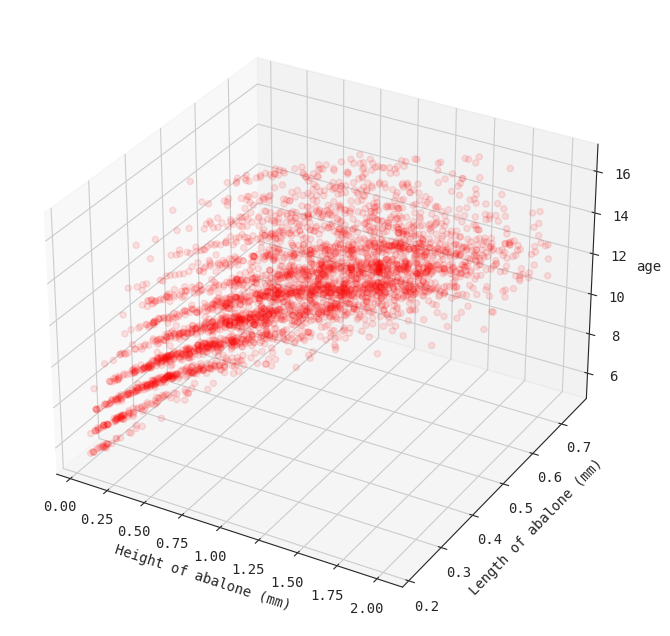

In [52]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('age')
ax.scatter3D(abalone7['whole_wt'],
             abalone7['length'], 
             abalone7['age'],
             c='red',
             alpha=0.1);

plt.show()

If we look at the plots more closely, we can see that there are more small values of `whole_wt` in male than in the other two. It is also important to see that the distribution of adults is very similar except in the behavior of the extreme values.

In [53]:
macho =  abalone7[abalone7['sex_enc']==2]
female = abalone7[abalone7['sex_enc']==0]
infant = abalone7[abalone7['sex_enc']==1]

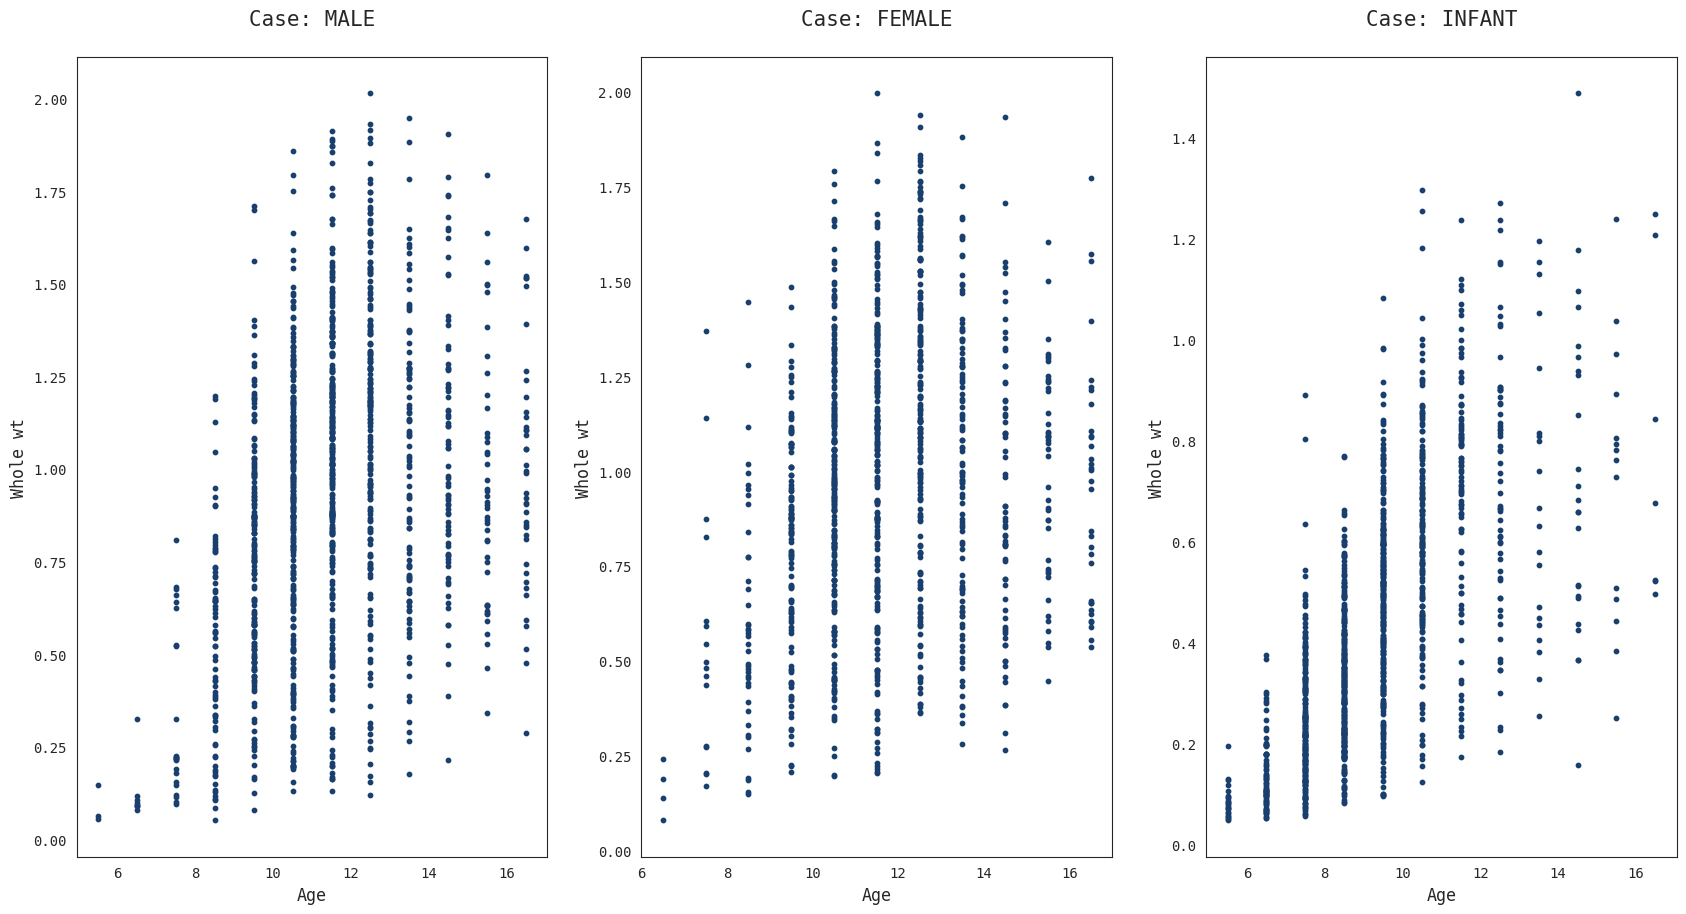

In [54]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)

ax1.scatter(data = macho, x="age", y="whole_wt", cmap = 'rainbow', s=10)
ax1.set_title('Case: MALE\n',size=15)
ax1.set_xlabel('Age',size=12)
ax1.set_ylabel('Whole wt',size=12);

ax2.scatter(data = female, x="age", y="whole_wt", cmap = 'rainbow', s=10)
ax2.set_title('Case: FEMALE\n',size=15)
ax2.set_xlabel('Age',size=12)
ax2.set_ylabel('Whole wt',size=12);

ax3.scatter(data = infant, x="age", y="whole_wt", cmap = 'rainbow', s=10)
ax3.set_title('Case: INFANT\n',size=15)
ax3.set_xlabel('Age',size=12)
ax3.set_ylabel('Whole wt',size=12);


For this we are going to find the three equations that represent them, which are: 

In [55]:
import numpy as np
from scipy.optimize import curve_fit
"""Male"""
x = macho['age']
y = macho['whole_wt']
popt, pcov = curve_fit(lambda t, a, b: a * np.exp(b * t), x, y)
# Extract the optimised parameters
a = popt[0]
b = popt[1]
# y_macho ≈ 0.46 exp(0.06 x)
"""Female"""
x = female['age']
y = female['whole_wt']
popt, pcov = curve_fit(lambda t, a, b: a * np.exp(b * t), x, y)
# Extract the optimised parameters
a = popt[0]
b = popt[1]
# y_female ≈ 0.64 exp(0.04 x)
"""Infant"""
x = infant['age']
y = infant['whole_wt']
popt, pcov = curve_fit(lambda t, a, b: a * np.exp(b * t), x, y)
# Extract the optimised parameters
a = popt[0]
b = popt[1]
# y_infant ≈ 0.12 exp(0.14 x)

**These three equations answer question Q1 of the paper.** These equations represent the behavior of the variables concerned with respect to each subcategory of `sex`.

$$ Ymale ≈ 0.46* exp(0.06 x) \  $$ 
$$ Yfemale ≈ 0.64* exp(0.04 x)\ $$
$$ Yinfant ≈ 0.12* exp(0.14 x)\ $$

<h1 style="background:#e61010; border:0; border-radius: 16px; color:#D3D3D3"><center>3.Model</center></h1>

We can solve this problem in many ways. We have opted for the following approach:

- 1- Make a comparison of 6 regression models: `LinearRegression`, `Lasso`, `Ridge`, `ElasticNet`, `CatBoostRegressor` and `XGBRegressor`.
- 2- See which of these models has a lower error.
- 3- Of the selected model, see which are the characteristics that most determine the year of the abalone.

Let us begin

Of the 6 selected models that can be seen in the image, `CatBoostRegressor` is the one that works best.

In [56]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer

# prepare dataset and drop id columns
X = abalone7.drop(columns=['age']).copy()
y = abalone7['age'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, shuffle=True)

# get all numerical & categorical features
#cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_cols = [col for col in X_train.columns if X_train[col].dtype == 'float']

# build transformer
preprocessing = make_column_transformer(
    (StandardScaler(),num_cols)
)

# preprocess data
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [64]:
results = dict()

models = [
    ('Linreg',LinearRegression()),
    ('Lasso',Lasso()),
    ('Ridge',Ridge()),
    ('ElasticNet',ElasticNet()),
    #('LGBM',LGBMRegressor()),
    ('CATB',CatBoostRegressor(verbose=0)),
    ('XGB',XGBRegressor(verbosity=0)),
]

for name, model in models:
    model.fit(X_train, y_train),
    y_hat = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_hat, squared=False)
    results[name] = rmse
    print('hecho')

hecho
hecho
hecho
hecho
hecho
hecho


In [65]:
from warnings import filterwarnings
filterwarnings('ignore')

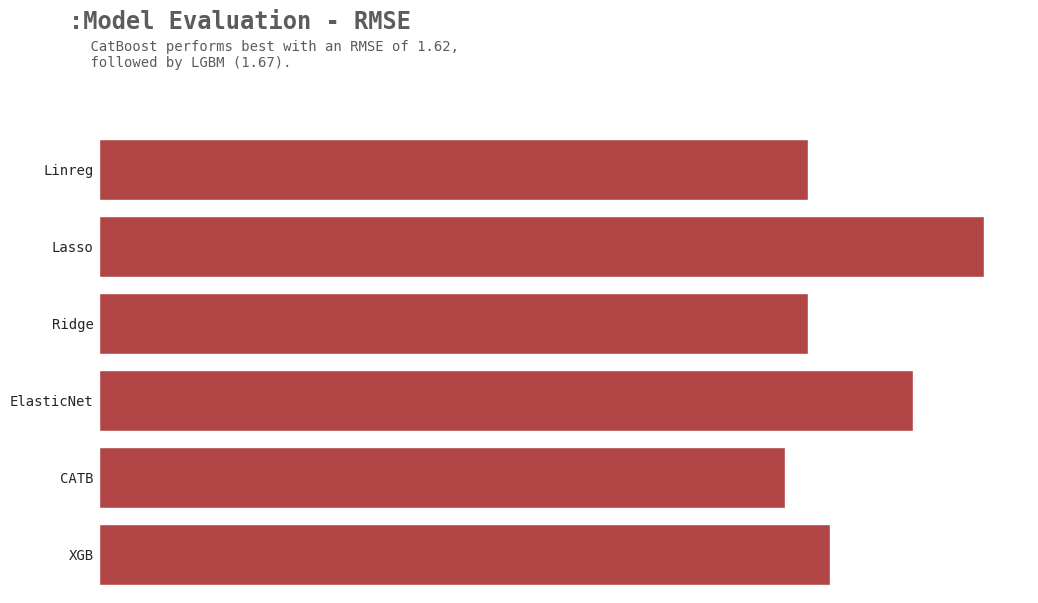

In [66]:
df_results = pd.DataFrame([results])
df_results = df_results.transpose()
df_results = df_results.rename(columns={0:'RMSE'})

fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(
    data=df_results,
    x='RMSE',
    y=df_results.index,
    color=cmap_reds[0],
    saturation=0.5,
    ax = ax
)

# Text & Titles
fig.text(
    s=':Model Evaluation - RMSE',
    x=0.1, y=1.05,
    color=txt_color,
    fontsize=17, fontweight='bold'
)

fig.text(
    s='''
    CatBoost performs best with an RMSE of 1.62,
    followed by LGBM (1.67).
    ''',
    x=0.09, y=0.96,
    color=txt_color
)

ax.set_xlabel('')
ax.set_xticks([])
ax.tick_params(length=0)

for spine in ['top','left','right','bottom']:
    ax.spines[spine].set_visible(False)

plt.show()

In [68]:
df_results.sort_values('RMSE', ascending=True)

RMSE
CATB        1.618789
Ridge       1.673550
Linreg      1.673555
XGB         1.725052
ElasticNet  1.922501
Lasso       2.089666

Now we will use the chosen model, we will apply hyperparameters to it to reduce the error and we will see how it works for our model. We have lowered the error from **1.62 to 1.59**. These hyperparameters are:

Name | Value 
:--------: | :-------: 
iterations | 500
max_depth | 5 
learning_rate | 0.04
random_seed | 1066
logging_level | 'Silent'

In [75]:
model = CatBoostRegressor(iterations=500, max_depth=5, learning_rate=0.04, random_seed=1066, logging_level='Silent')
model.fit(X_train, y_train, use_best_model=True, early_stopping_rounds=10)

rmse = round(np.sqrt(mean_squared_error(y_test, model.predict(X_test))),2)
print('Error using hyperparameters is: ',rmse)


You should provide test set for use best model. use_best_model parameter has been switched to false value.


Error using hyperparameters is:  1.59


Finally, the three parameters that best determine, according to our model, are (in descending order):

In [76]:
X_test_1 = pd.DataFrame(X_test)
X_test_1.columns = [['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt',
       'shell_wt', 'water/blood']]


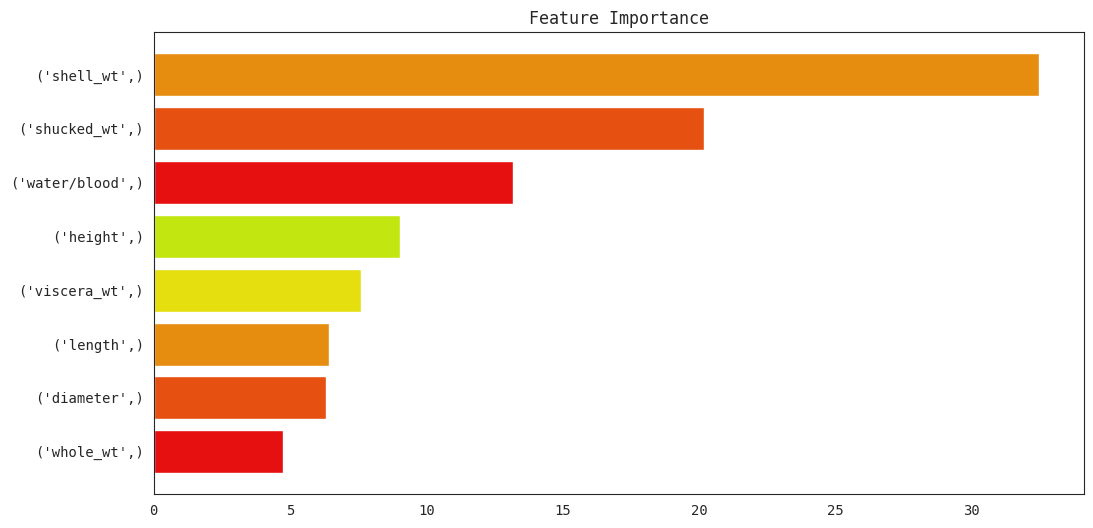

In [80]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color=cmap_reds)
plt.yticks(range(len(sorted_idx)), np.array(X_test_1.columns)[sorted_idx])
plt.title('Feature Importance');

In [82]:
table = pd.DataFrame()
table['Feature'] = ['shell_wt','shucked_wt','water/blood']
table['Values'] = [31.41,19.97,13.11]
table.head()

Feature  Values
0     shell_wt   31.41
1   shucked_wt   19.97
2  water/blood   13.11

<h1 style="background:#e61010; border:0; border-radius: 16px; color:#D3D3D3"><center>4.Conclusions</center></h1>

In this paper a thorough analysis has been made to determine the age of the abalone. First we have looked at the general characteristics of the dataset. Then we have cleaned the dataset apart from condition_1, thus finding a new variable `water/blood`. We were able to see the relationships between variables and their behaviors with respect to each `sex` subcategory. Finally, we have made a model combining 7 different regression models, choosing `CatBoostRegressor` for the low error it gave. At this point, we used hyperparameters to further reduce the error and finally determined the characteristics that matter most in determining the age of the abalone. The results are surprising.

*Note: we did not want to add variables formed by the combination of the original features simply because we wanted to know which variables were the most important when calculating the age of the abalone without further modification.*

Finally, the conclusions we have reached will be the answers to the questions of the paper:
    
- **1. How does weight change with age for each of the three sex categories?**
    - **Answer**: We have found the 3 equations that determine the relationship of the two variables for each subcategory. The relationship is smooth positive exponential
    $$ Ymale ≈ 0.46* exp(0.06 x) \  $$ 
$$ Yfemale ≈ 0.64* exp(0.04 x)\ $$
$$ Yinfant ≈ 0.12* exp(0.14 x)\ $$


- **2. Can you estimate an abalone's age using its physical characteristics?**
    - **Answer**: To answer this question we have used 7 different models and we have compared the errors they gave to choose the most suitable. In the end our choice based on RMSE is the model of `CatBoostRegressor`. Once used we have applied hyperparameters to reduce the `1.62 error to 1.59`.
    
- **3. Investigate which variables are better predictors of age for abalones.**
    - **Answer**: The parameters that best predict the target variable are `shell_wt`,`shucked_wt`and `water/blood`. This means that the weight was more important than the size of the abalone. *Remember that these results are based on a non-linear model. It could have been done in other ways which suggests the diversity of the resolution of this type of problem.*

**Thanks for reading me!!**